1. Τι είναι το HAR (Αναγνώριση Ανθρώπινων Δραστηριοτήτων;)
Η Αναγνώριση Ανθρώπινων Δραστηριοτήτων (HAR) είναι ένας τομέας της μηχανικής μάθησης που επικεντρώνεται στην αναγνώριση και ταξινόμηση των ανθρώπινων δραστηριοτήτων με βάση δεδομένα από αισθητήρες. Αυτά τα δεδομένα συλλέγονται συνήθως από συσκευές όπως smartphones, φορητές συσκευές ή άλλες συσκευές IoT (Internet of Things), και χρησιμοποιούνται για την αναγνώριση καθημερινών δραστηριοτήτων, όπως το περπάτημα, το τρέξιμο, η καθιστική θέση ή η ανάπαυση.

Γιατί είναι Σημαντικό το HAR;
Η Αναγνώριση Ανθρώπινων Δραστηριοτήτων (HAR) είναι σημαντική, γιατί βοηθά σε διάφορους τομείς, όπως:

Παρακολούθηση Υγείας: Χρησιμοποιείται για την παρακολούθηση δραστηριοτήτων ατόμων, ειδικά ηλικιωμένων, με σκοπό την ανίχνευση πτώσεων ή άλλων ασυνήθιστων δραστηριοτήτων.

Φυσική Κατάσταση και Άσκηση: Χρησιμοποιείται σε εφαρμογές όπως το Fitbit ή το Apple Health για την παρακολούθηση φυσικής δραστηριότητας.

Έξυπνα Σπίτια και Αυτοματισμοί: Συσκευές σε έξυπνα σπίτια μπορούν να αναγνωρίσουν ανθρώπινες δραστηριότητες (π.χ., καθιστικό, μαγειρική) και να αυτοματοποιούν λειτουργίες (π.χ., άναμμα φώτων, ρύθμιση θερμοκρασίας).

Ασφάλεια και Εποπτεία: Συστήματα παρακολούθησης που βασίζονται στο HAR μπορούν να αναγνωρίσουν την ανθρώπινη δραστηριότητα και να βελτιώσουν την ασφάλεια σε δημόσιους χώρους.

 
 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_4378.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_747.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_561.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_345.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_3019.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_2566.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_3156.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_3889.jpg
/kaggle/input/human-action-recognition-har-dataset

Bιβλιοθήκες

In [9]:

!pip install tensorflow



Loading the data

In [11]:
import os
import glob
import random
import numpy as np
import pandas as pd



In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense


from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

train τα δεδομένα

In [15]:
train_data = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv")
test_data = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv")

In [16]:
train_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/train/*") 
test_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/test/*")

In [17]:
train_data

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [18]:
train_data.label.value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

In [21]:
import plotly.express as px
HAR = train_data.label.value_counts()
fig = px.pie(train_data, values=HAR.values, names=HAR.index, title='Distribution of Human Activity')
fig.show()

In [20]:
filename = train_data['filename']

situation = train_data['label']
filename

0            Image_1.jpg
1            Image_2.jpg
2            Image_3.jpg
3            Image_4.jpg
4            Image_5.jpg
              ...       
12595    Image_12596.jpg
12596    Image_12597.jpg
12597    Image_12598.jpg
12598    Image_12599.jpg
12599    Image_12600.jpg
Name: filename, Length: 12600, dtype: object

In [ ]:
Making function that take random path and display the image

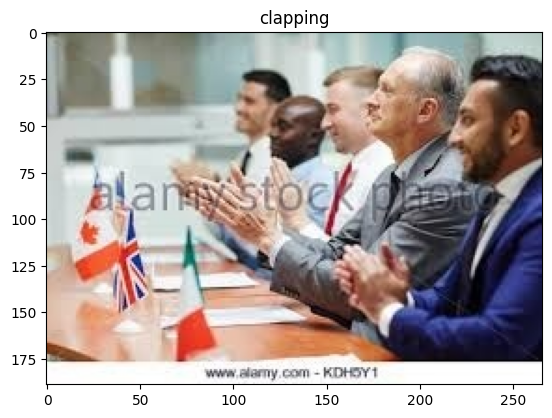

In [23]:
def displaying_random_images():
    num = random.randint(1,10000)
    imgg = "Image_{}.jpg".format(num)
    train = "../input/human-action-recognition-har-dataset/Human Action Recognition/train/"
    if os.path.exists(train+imgg):
        testImage = img.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_data.loc[train_data['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")
displaying_random_images()

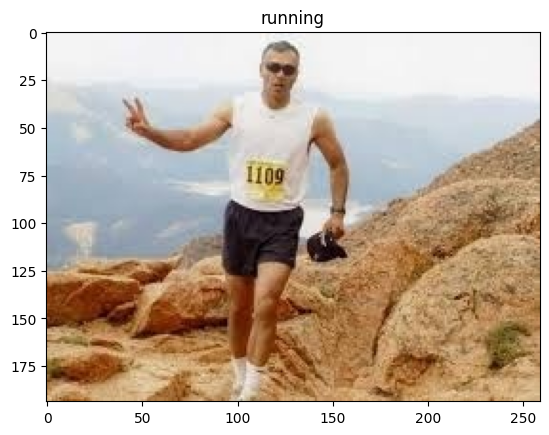

In [24]:
displaying_random_images()

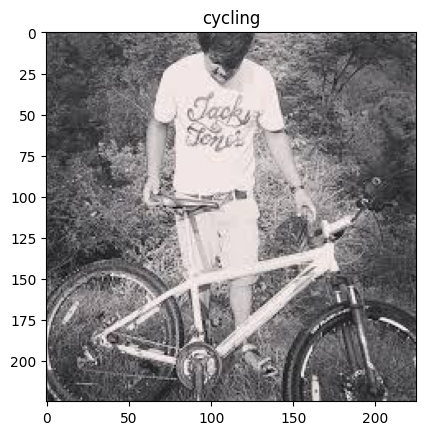

In [25]:
displaying_random_images()


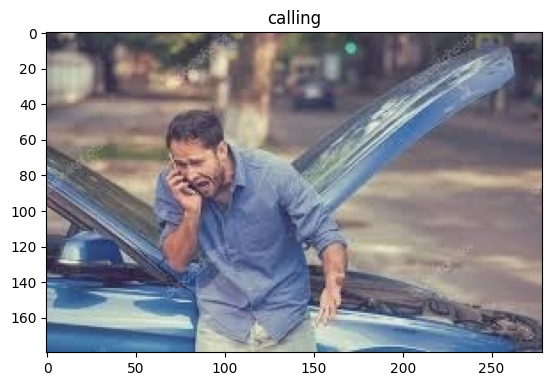

In [26]:
displaying_random_images()

Data preprocessing

In [27]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + filename[i]    
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])
img_shape= (160,160,3)
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [ ]:
y_train = to_categorical(np.asarray(train_data["label"].factorize()[0]))
print(y_train[0])

CNN model
Το CNN (Convolutional Neural Network), δηλαδή Συνελικτικό Νευρωνικό Δίκτυο, είναι ένα είδος νευρωνικού δικτύου που χρησιμοποιείται κυρίως για την ανάλυση εικόνας και βίντεο. Τα CNNs είναι πολύ δημοφιλή για εργασίες όπως η αναγνώριση εικόνας, η ανίχνευση αντικειμένων και η κατηγοριοποίηση εικόνας, λόγω της ικανότητάς τους να μαθαίνουν χαρακτηριστικά από τις εικόνες με πολύ αποδοτικό τρόπο.

Τι είναι το CNN και πώς λειτουργεί;
Το Συνελικτικό Νευρωνικό Δίκτυο είναι ένα ειδικό είδος νευρωνικού δικτύου που περιλαμβάνει "συνελικτικά στρώματα" (convolutional layers). Τα συνελικτικά στρώματα αναλαμβάνουν την εξαγωγή χαρακτηριστικών από τις εικόνες, και αυτά τα χαρακτηριστικά χρησιμοποιούνται για την κατηγοριοποίηση ή άλλες εργασίες.

In [29]:
model = tf.keras.applications.EfficientNetB7(
    include_top=False,
    input_shape=(160,160,3),
    pooling="avg",
    classes=15,
    weights=None  # Χρησιμοποιούμε τυχαία βάρη
)


In [30]:
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
efficientnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
efficientnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)